# Intro

It's the last time we meet in class for exercises! And to celebrate this mile-stone, we've put together an amazing set of exercises. And if you're behind, don't worry. The workload is low!

  - Part A: First, we play around with sentiment analysis
  - Part B **(optional)**: We study paths in networks using a fun new dataset. (If only doing part A feels too easy for you, I've added a really fun exercise that should be fun and challenging.)

But first, watch this video that touches upon your final project and Assignment 2 (which will be released later Wednesday),

> [**Video**](https://www.dropbox.com/scl/fi/jh3490oqnqh4yl629ik09/ProjectAndAssigment.mp4?rlkey=2uyl7tq0xgzydl5u8pqzncf92&dl=0) about the Independent Project and Assignment 2

# Part A: Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Wiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.


> [**Video Lecture**](https://www.dropbox.com/scl/fi/u0rn767hg7e6ue4ryx41a/Sentiment.mp4?rlkey=4kwfqv6pkw1aijshm5zqe8ehh&dl=0): Sentiment and dictionary-based methods.



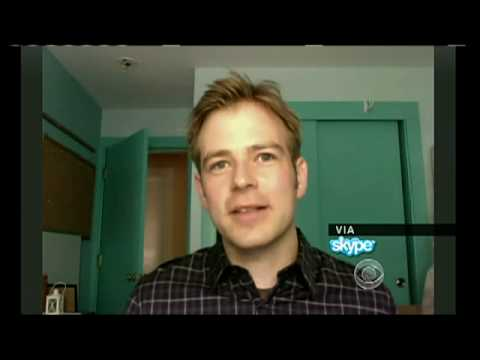

In [7]:
# There's also this one from 2010 showing Sune Lehmann on national television
from IPython.display import YouTubeVideo, HTML, display
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


_Exercise 1_: Sentiment distribution. 
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.


The word list was generated by users on Mechanical Turk to rate how a given word made them feel on a nine point integer scale (from 1 - saddest to 9 - happiest), obtaining 50 independent evaluations per word. On each task (of 100 tasks), an user had to evaluate 100 randomly assigned words.

> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).

In [26]:
import csv
import nltk

# Open the file
with open('../data/labMIT-1.0.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')

    # Skip the first row
    next(reader)

    # Initialize the list of weighted tokens
    weighted_tokens = []

    # Loop through the rows in the file
    for row in reader:
        # Get the word and the happiness average
        word = row[0]
        happiness_average = float(row[2])

        # Tokenize the word
        tokens = nltk.word_tokenize(word)

        # Add the weighted tokens to the list
        for token in tokens:
            weighted_tokens.append((token, happiness_average))

# Print the weighted tokens
for token, weight in weighted_tokens:
    print(f'{token}: {weight}')


laughter: 8.5
happiness: 8.44
love: 8.42
happy: 8.3
laughed: 8.26
laugh: 8.22
laughing: 8.2
excellent: 8.18
laughs: 8.18
joy: 8.16
successful: 8.16
win: 8.12
rainbow: 8.1
smile: 8.1
won: 8.1
pleasure: 8.08
smiled: 8.08
rainbows: 8.06
winning: 8.04
celebration: 8.02
enjoyed: 8.02
healthy: 8.02
music: 8.02
celebrating: 8.0
congratulations: 8.0
weekend: 8.0
celebrate: 7.98
comedy: 7.98
jokes: 7.98
rich: 7.98
victory: 7.98
christmas: 7.96
free: 7.96
friendship: 7.96
fun: 7.96
holidays: 7.96
loved: 7.96
loves: 7.96
loving: 7.96
beach: 7.94
hahaha: 7.94
kissing: 7.94
sunshine: 7.94
beautiful: 7.92
delicious: 7.92
friends: 7.92
funny: 7.92
outstanding: 7.92
paradise: 7.92
sweetest: 7.92
vacation: 7.92
butterflies: 7.92
freedom: 7.9
flower: 7.88
great: 7.88
sunlight: 7.88
sweetheart: 7.88
sweetness: 7.88
award: 7.86
chocolate: 7.86
hahahaha: 7.86
heaven: 7.86
peace: 7.86
splendid: 7.86
success: 7.86
enjoying: 7.84
kissed: 7.84
attraction: 7.82
celebrated: 7.8
hero: 7.8
hugs: 7.8
positive: 7.8


In [19]:
def calculate_sentiment(input_tokens):
    # Initialize the total weight and the number of tokens
    total_weight = 0
    num_tokens = 0

    # Loop through the weighted tokens
    for token, weight in weighted_tokens:
        # If the token is in the input tokens
        if token in input_tokens:
            # Add the weight to the total weight
            total_weight += weight
            # Increment the number of tokens
            num_tokens += 1

    # If there are no tokens in the input tokens
    if num_tokens == 0:
        # Return 0 as the sentiment
        return 0

    # Calculate the average weight
    average_weight = total_weight / num_tokens

    # Return the average weight as the sentiment
    return average_weight

print(calculate_sentiment(["hello", "how", "are", "you"]))
print(calculate_sentiment(["love", "happy", "great", "awesome"]))
print(calculate_sentiment(["awful", "terrible", "sad", "bad"]))

5.316
8.049999999999999
2.6950000000000003


In [18]:
# Alternative method that doesn't work

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

def calculate_sentiment2(words):
    # Initialize the Sentiment Intensity Analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Calculate the weighted sentiment score
    total_score = 0
    total_weight = 0

    for word, weight in weighted_tokens:
        scores = analyzer.polarity_scores(word)
        total_score += scores['compound'] * weight
        total_weight += weight

    average_score = total_score / total_weight

    print(average_score)

print(calculate_sentiment2(["hello", "how", "are", "you"]))
print(calculate_sentiment2(["love", "happy", "great", "awesome"]))
print(calculate_sentiment2(["awful", "terrible", "sad", "bad"]))

0.02001981708636697
None
0.02001981708636697
None
0.02001981708636697
None


> * Iterate over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property. 

In [21]:
import pathlib
import re
import pandas as pd
from enum import Enum
from pathlib import Path
import networkx as nx

def read_text_from_file(filename):
    try:
        with open(filename, "r", encoding="utf-8") as f:
            return f.read()
    except Exception as e:
        print(f"An error occurred while processing the file {filename}")
        return None

def extract_links(text):
    raw_links = re.findall("[[([^[]]*)]]", text)
    return [link.split("|")[0] for link in raw_links]

def extract_name_from_filename(filename):
    return Path(filename).stem.replace("%3F", "?")

def count_words_in_text(text):
    return len(re.findall(r'\b\w+\b', text))

def read_csv_to_set(filepath):
    return set(pd.read_csv(filepath)["WikipediaPageName"])

def add_edges_from_links(net, rap_name, links, all_rap_names):
    out_rap_names = set(links) & all_rap_names
    for out_rap_name in out_rap_names:
        net.add_edge(rap_name, out_rap_name)

class Coast(Enum):
    EAST_COAST = "east_coast"
    WEST_COAST = "west_coast"

def add_coast_rap_data(net, coast, root_folder, all_rap_names):
    root = Path(root_folder, coast.value)
    
    for current_file in root.rglob("*.txt"):
        text = read_text_from_file(current_file)
        if text is None:
            continue

        rap_name = extract_name_from_filename(current_file)
        net.add_node(rap_name, coast=coast, word_count=count_words_in_text(text))
        
        links = extract_links(text)
        add_edges_from_links(net, rap_name, links, all_rap_names)

root_folder = "../data/"
east_coast_rappers = read_csv_to_set(root_folder + "EastCoastRappers.csv")
west_coast_rappers = read_csv_to_set(root_folder + "WestCoastRappers.csv")
all_rap_names = east_coast_rappers | west_coast_rappers

rap_network = nx.DiGraph()

add_coast_rap_data(rap_network, Coast.EAST_COAST, root_folder, all_rap_names)
add_coast_rap_data(rap_network, Coast.WEST_COAST, root_folder, all_rap_names)

rap_network = rap_network.subgraph(next(nx.weakly_connected_components(rap_network)))


In [22]:
def tokenize_text(text):
    return re.findall(r'\b\w+\b', text.lower())

def extract_filename_from_name(rap_name, root_folder, coast):
    safe_name = rap_name.replace("?", "%3F")
    filename = f"{root_folder}{coast.value}/{safe_name}.txt"
    return filename

def add_sentiment_to_nodes(net, root_folder):
    for node, attrs in net.nodes(data=True):
        coast = attrs['coast']
        filename = extract_filename_from_name(node, root_folder, coast)
        
        text = read_text_from_file(filename)
        if text is None:
            continue

        tokens = tokenize_text(text)
        sentiment = calculate_sentiment(tokens)
        
        net.nodes[node]['sentiment'] = sentiment

add_sentiment_to_nodes(rap_network, root_folder)

> * Remember histograms? Create a histogram of all character's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2).

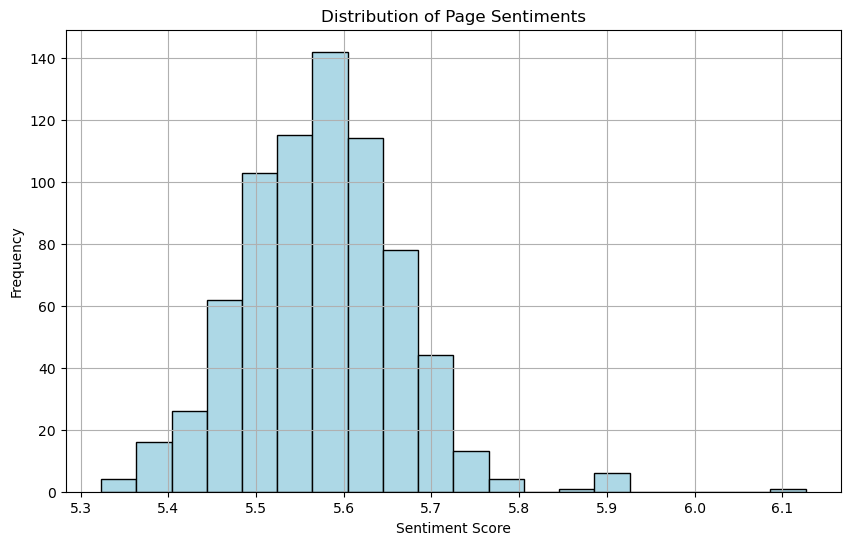

In [24]:
import matplotlib.pyplot as plt

def plot_sentiment_histogram(net):
    sentiments = [attrs['sentiment'] for _, attrs in net.nodes(data=True)]
    
    plt.figure(figsize=(10, 6))
    plt.hist(sentiments, bins=20, color='lightblue', edgecolor='black')
    
    plt.title("Distribution of Page Sentiments")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    
    plt.show()
    
plot_sentiment_histogram(rap_network)

> * Who are the 10 rappers with happiest and saddest pages?

In [34]:
def top_and_bottom_rappers_by_sentiment():
    sorted_rappers = sorted(rap_network.nodes(data=True), key=lambda x: x[1]['sentiment'])
    
    bottom_10 = sorted_rappers[:10]
    top_10 = sorted_rappers[-10:]
    
    print("10 rappers with the saddest pages:")
    for i, (rapper, attrs) in enumerate(bottom_10, 1):
        print(f"{i}. {rapper} (Sentiment: {attrs['sentiment']})")

    print("\n10 rappers with the happiest pages:")
    for i, (rapper, attrs) in enumerate(reversed(top_10), 1):
        print(f"{i}. {rapper} (Sentiment: {attrs['sentiment']})")

top_and_bottom_rappers_by_sentiment()

10 Rappers with the Saddest Pages:
1. Knightowl (Sentiment: 5.32330472103004)
2. Seagram (rapper) (Sentiment: 5.327580645161292)
3. AR-Ab (Sentiment: 5.336975945017173)
4. Jimmy Wopo (Sentiment: 5.361203438395419)
5. Killa Sin (Sentiment: 5.365540983606563)
6. E.D.I. Mean (Sentiment: 5.37053045186641)
7. Half a Mill (Sentiment: 5.370728155339804)
8. Tim Dog (Sentiment: 5.3811551724137825)
9. Shady Nate (Sentiment: 5.38218390804597)
10. Chinx (Sentiment: 5.384287901990818)

10 Rappers with the Happiest Pages:
1. Phil Da Agony (Sentiment: 6.126666666666666)
2. G-Nut (Sentiment: 5.895454545454546)
3. G-Stack (Sentiment: 5.891333333333334)
4. V-White (Sentiment: 5.891333333333334)
5. Dubb 20 (Sentiment: 5.889285714285714)
6. Mr. Skrillz (Sentiment: 5.889285714285714)
7. DB Tha General (Sentiment: 5.889285714285714)
8. Beeda Weeda (Sentiment: 5.868125)
9. Only Won (Sentiment: 5.8003921568627455)
10. Mac Shawn (Sentiment: 5.7976923076923095)


This makes sense, as Wikipedia articles are supposed to be neutral. But it can also be one way to evaluate how sad each rapper's life is (deaths, jail, depression etc).

<!---
> * Now we average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected characters. 
>   - What are the three happiest communities? 
>   - what are the three saddest communities?
>   - Do these results confirm what you can learn about each community by skimming the wikipedia pages?
--->

**Note**: Calculating sentiment takes a long time, so arm yourself with patience as your code runs (remember to check that it runs correctly, before waiting patiently). Further, these tips may speed things up. And save somewhere, so you don't have to start over.

**Tips for speed**
* If you use `freqDist` prior to finding the sentiment, you only have to find it for every unique word and hereafter you can do a weighted mean.
* More tips for speeding up loops https://wiki.python.org/moin/PythonSpeed/PerformanceTips#Loops

*Exercise 2*: West coast and East coast.

Now, let's check if the pages of rappers from different coasts tend to have different sentiment. 

> * First, think about it for a second: Do you expect pages of rappers from different coasts to have different sentiment? Why/why not?


Yes. Different states have different quality of living, and that can also be determined geographically.

> * Next, Download [this file](https://github.com/SocialComplexityLab/socialgraphs2023/edit/main/files/Rappers.csv) if you do not have it already.
> * Start by plotting the distribution of sentiment for the pages of east-coast and west-coast rappers separately. 


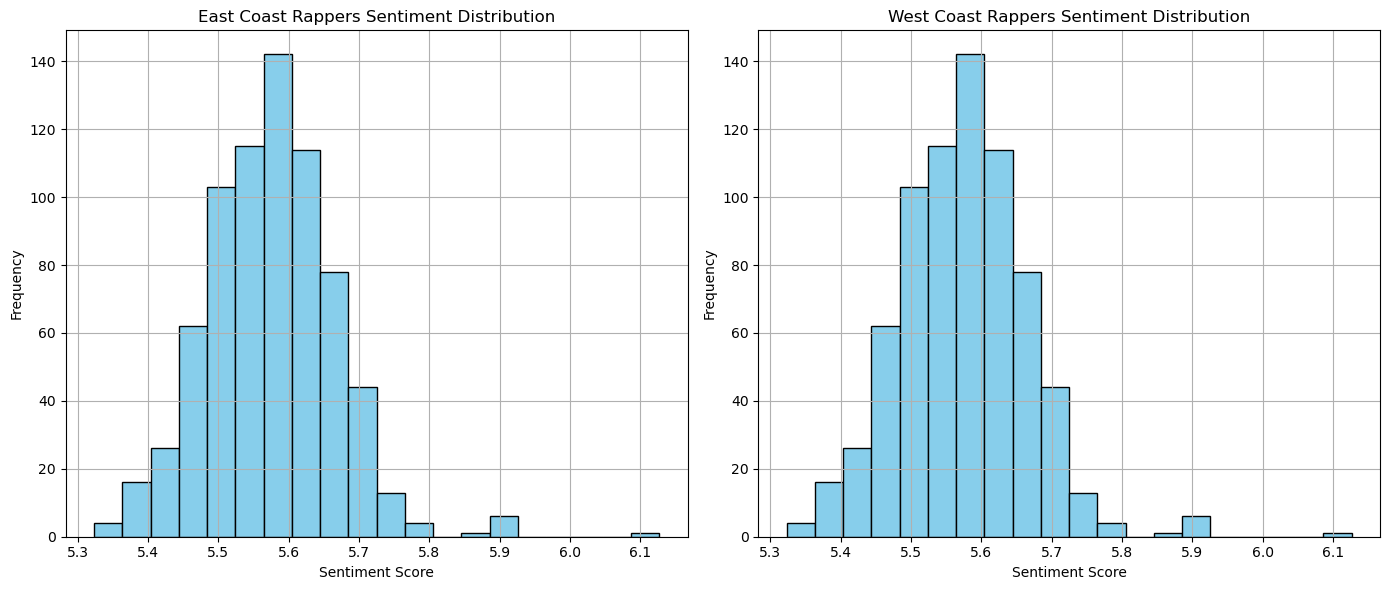

In [70]:
# Create subgraphs for East Coast and West Coast rappers
east_coast_nodes = [n for n, attrs in rap_network.nodes(data=True) if attrs['coast'] == Coast.EAST_COAST]
west_coast_nodes = [n for n, attrs in rap_network.nodes(data=True) if attrs['coast'] == Coast.WEST_COAST]

east_coast_subgraph = rap_network.subgraph(east_coast_nodes)
west_coast_subgraph = rap_network.subgraph(west_coast_nodes)

# Plot histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sentiments = [attrs['sentiment'] for _, attrs in rap_network.nodes(data=True)]

plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')

plt.title("East Coast Rappers Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1, 2, 2)

plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')

plt.title("West Coast Rappers Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

> * Now calculate the mean, median, 10th percentile, and 90 percentile sentiment value for each coast and indicate those values on the corresponding histograms.

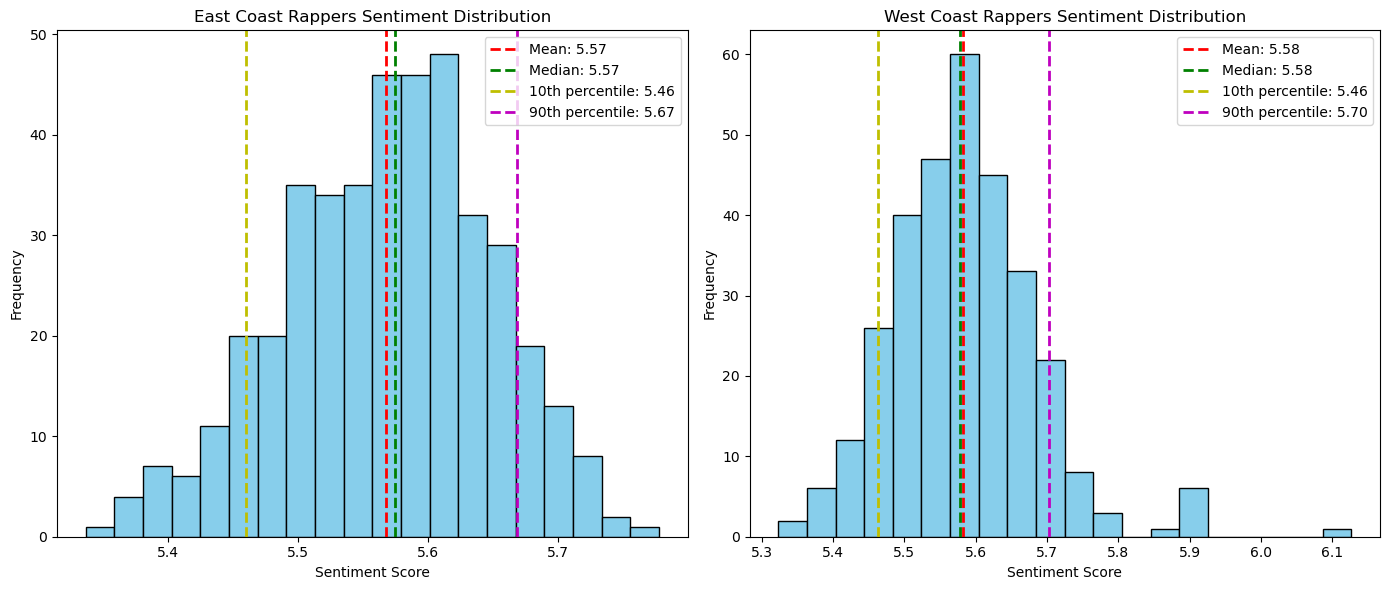

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sentiment_histogram_with_stats(net, title):
    sentiments = [attrs['sentiment'] for _, attrs in net.nodes(data=True)]

    mean_sentiment = np.mean(sentiments)
    median_sentiment = np.median(sentiments)
    percentile_10th = np.percentile(sentiments, 10)
    percentile_90th = np.percentile(sentiments, 90)

    plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')
    
    plt.axvline(mean_sentiment, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sentiment:.2f}')
    plt.axvline(median_sentiment, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_sentiment:.2f}')
    plt.axvline(percentile_10th, color='y', linestyle='dashed', linewidth=2, label=f'10th percentile: {percentile_10th:.2f}')
    plt.axvline(percentile_90th, color='m', linestyle='dashed', linewidth=2, label=f'90th percentile: {percentile_90th:.2f}')
    
    plt.title(title)
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.legend()
    
# Plot histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_sentiment_histogram_with_stats(east_coast_subgraph, "East Coast Rappers Sentiment Distribution")

plt.subplot(1, 2, 2)
plot_sentiment_histogram_with_stats(west_coast_subgraph, "West Coast Rappers Sentiment Distribution")

plt.tight_layout()
plt.show()

> * Comment on these distributions and how they relate to the overall sentiment distribution you calculated in Exercise 1 above.

The distributions match the exersize, so they must be correct. The sentiments also make sense, because the Wikipedia articles are supposed to be mostly neutral. It can be assumed that the outliers of West Coast (5.9, 6.1) simply have smaller articles, so there is less words to intepret sentiment from.

> * Use the "label shuffling technique" that I illustrated in **Week 5, exercise 7** to determine whether or not 
>   1. the west-coast pages tend to have lower sentiment than a similarly sized group of randomly chosen rapper pages (pick random groups 1000 times and reject the hypothesis if 5% of the random outcomes are lower than the actual value observed for the west-coast pages)

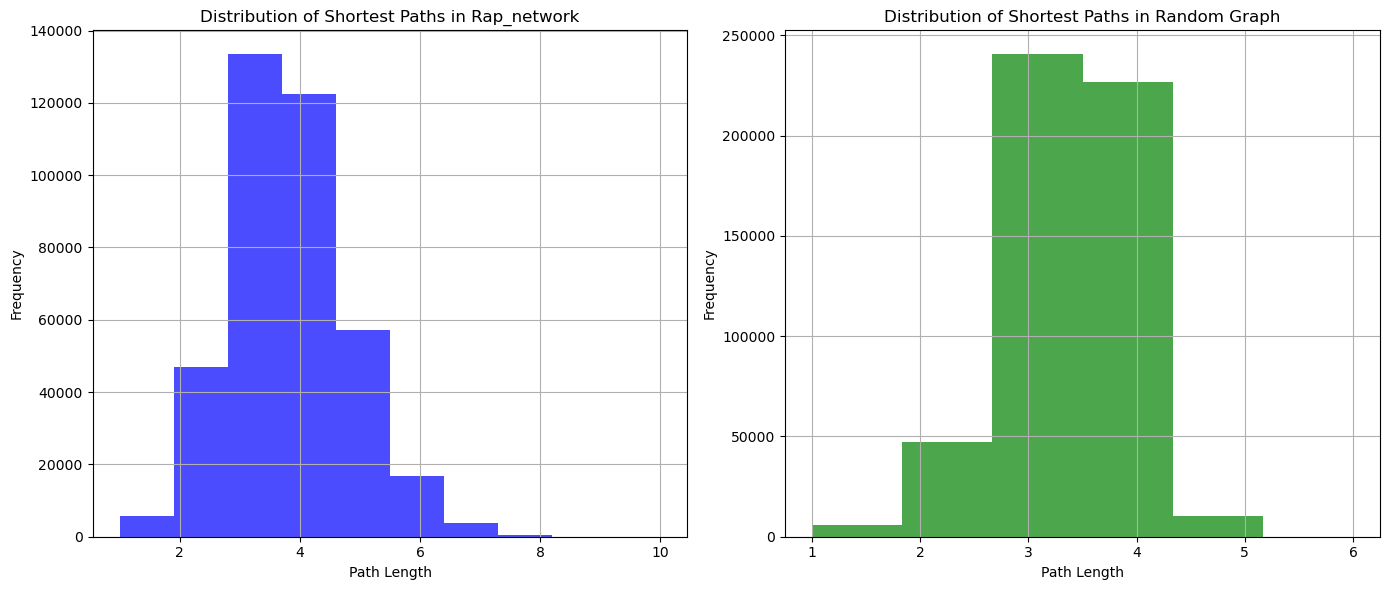

('Not defined (Graph is not connected)', 3.354263706115558)

In [73]:
# Copied from W5 EX7, does not match this task!

# ----

# Calculate the average shortest path length for Rap_network
try:
    avg_shortest_path_length_rap = nx.average_shortest_path_length(rap_network)
except nx.NetworkXError:
    avg_shortest_path_length_rap = "Not defined (Graph is not connected)"

# Generate a random graph with the same number of nodes N and a probability of connection p
# Calculate p as the actual number of edges divided by the maximum possible number of edges
N = rap_network.number_of_nodes()
E = rap_network.number_of_edges()
p = E / (N * (N - 1))

# Generate the random graph
random_graph = nx.erdos_renyi_graph(N, p)

# Calculate the average shortest path length for the random graph
try:
    avg_shortest_path_length_random = nx.average_shortest_path_length(random_graph)
except nx.NetworkXError:
    avg_shortest_path_length_random = "Not defined (Graph is not connected)"

# Generate histograms for the distribution of shortest paths
def get_shortest_path_lengths(graph):
    lengths = []
    for node in graph.nodes():
        length = nx.single_source_shortest_path_length(graph, node)
        lengths.extend(list(length.values())[1:])
    return lengths

# Shortest path lengths for Rap_network
shortest_path_lengths_rap = get_shortest_path_lengths(rap_network)

# Shortest path lengths for random graph
shortest_path_lengths_random = get_shortest_path_lengths(random_graph)

# Plotting histograms
plt.figure(figsize=(14, 6))

# Histogram for Rap_network
plt.subplot(1, 2, 1)
plt.hist(shortest_path_lengths_rap, bins=max(shortest_path_lengths_rap), color='blue', alpha=0.7, label='Rap_network')
plt.title('Distribution of Shortest Paths in Rap_network')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Random Graph
plt.subplot(1, 2, 2)
plt.hist(shortest_path_lengths_random, bins=max(shortest_path_lengths_random), color='green', alpha=0.7, label='Random Graph')
plt.title('Distribution of Shortest Paths in Random Graph')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

avg_shortest_path_length_rap, avg_shortest_path_length_random


>   2. the west-coast pages tend to have higher sentiment than a similarly sized group of randomly chosen character pages (again, use 1000 random draws and a 5% confidence bound).


>   3. (**optional**) Perhaps there are other divisions of rappers whose pages would be more likely to have different sentiment. Perhaps comparing groups of rappers of different sexes, races, etc. would give interesting results? Feel free to do a deep dive here, and let me know which groups you analyze and how you end up "guessing" a rapper's sex, race, etc. 

Comment: The "label shuffling technique" is incredibly useful. It may turn out to be a good tool to apply for your independent project. Keep it in mind.

# Part B (optional): The Wikispeedia Extravaganza

This final **AND OPTIONAL** exercise is about tying everything together. In this context "optional" means that the exercises below will not be on the assignment (but they're fun & cool).

We try to combine our work on networks plus our work on language in order to understand and analyze human behavior. We'll be working on a cool dataset of humans playing a game on (a special version of) wikipedia called "wikispeedia".  Note that the game is now called *The Wiki Game* and can be found at http://thewikigame.com/ ( ... while "http://wikispeedia.org" is a page about GPS coordinates of speed-traps). 

Here's how the game worked:

> In the game, users are asked to navigate from a given _source_ article (e.g. https://en.wikipedia.org/wiki/Gold_dollar) to a given _target_ article (e.g. https://en.wikipedia.org/wiki/Ronald_Reagan), **by only clicking Wikipedia links**. A condensed version of Wikipedia (4,604 articles) is used. 

So this dataset contains **human navigation paths** (clicking from page to page to find a target) and today we will work on this dataset to see if we can use our skills to understand how human navigation works. We will think about the following questions.

* Path lengths
* Betweenness from the human perspective
* What characterizes human paths?

Let's get started.

### Download the dataset

The first thing we're going to do is download the dataset. Today everything related to data is nice, clean, and easy to work with (Yay). You can get the dataset [here](https://snap.stanford.edu/data/wikispeedia.html). You will need to get 

* The list of wiki articles
* The network connections
* The navigation paths
* Plaintext of the wiki articles

### Path lengths

The first thing we want to take a look at is path lengths. NetworkX allows us to calculate the shortest path between any pair of articles. We begin by comparing the length of human and shortests paths. 

_Optional Exercises 1_
> * For each _source_/_target_ pair in the list of human navigation paths, calculate the shortest path using NetworkX. Plot the distribution of path lengths. Mine looks something like this (if I use an undirected graph):
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/shortest-path.png)


> * For each _source_/_target_ pair, calculate the length of the human path. The dataset contains information on people who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that information in the path. Justify your choice. Plot the distribution of human path lengths. If I ignore back steps, I get this on log-log scale:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/human-path.png)

> * How much longer are the human paths on average?
> * Create scatter plot where each point is a _source_/_target_ pair, and you have human path lengths on the $x$-axis and shortests paths on the $y$-axis.
> * Is there a correlation between human/shortest path-lengths? What is the correlation.

### Betweenness

An interesting definition of centrality is _betweenness centrality_ (here's a handy [link to the NetworkX documentation](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)). In a traditional setting, this measure calculates all shortest paths in the network and then each node gets a score according to which fraction of all shortest paths pass through that node.


In this part, we will create our own version of centrality, based on the _source_/_target_ pairs in our dataset. We define a node's **navigation centrality** as follows. 

> *Navigation centrality* of node $i$ is the fraction of all navigation paths that pass through $i$. We exclude the source and target from the count. If a node has not been visited by a search, the navigation centrality of that node is defined to be zero.

In the exercises below, we investigate the relationship between navigation centrality and betweenness centrality.

*Optional Exercises 2*

> Begin by calculating the betweenness centrality and navigation centrality of all nodes in the Wikispeedia dataset.
> Note that calculating the betweenness centrality can take quite a long time, so you might start it running in a separate notebook while first estimating it based on the existing human path.
>
> * First, list the 5 pages with highest navigation centrality.
> * Second, list the 5 pages with highest betweenness centrality.
> * Compare the two lists. Explain the differences between the two lists in your own words.
> * Create a scatterplot of betweenness centrality vs. navigation centrality.
> * Let's explore the pages that have navigation centrality equal to zero.
>   * How many pages have zero navigation centrality?
>   * What is the the page with zero navigation centrality and highest betweenness centrality? Can you explain why no human navigated to this page? Can you explain why the page is central in the actual link network? (For example, you can take a look at the degree of the node).
>   * Plot the distribution of betweenness centrality for the pages with zero navigation centrality. My plot on log-log scale:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/betweenness.png)

> * Now, let's *throw out all pages with zero navigation centrality* and compare navigation- and betweenness centrality for the remaining pages.
>   * What is the correlation between betweenness centrality and navigation centrality?
>   * Comment on the top 5 outliers.

# Bringing the text into the picture

Now that we have an idea about the differences between how humans and computers search in networks, we are going to dig a little deeper using the page content to test a hypothesis to explain why the human navigation paths are longer. The general idea is that humans (who don't know about the global network structure) tend to jump between pages that have related _content_. For this reason we expect that (on average) human navigation paths have more similar content than the shortest paths in the network (which might take 'surprising' shortcuts via relatively unrelated pages). In short.

> **Hypothesis H1**: Human navigation paths have more similar content than network shortest paths.

The way we'll test this hypothesis is to first represent each page as a vector using a bag-of-words approach, then we can calculate a distance between pairs of pages using some vector-space difference, and finally we'll characterize each path by its average pair-wise distance. Below, I've set up that process as an exercise. 

*Optional Exercises 3*

> First, create a TF-IDF vector for each page. You already know all about TF-IDF from last week's exercise. The main difference is that we now _characterize **each page** by a TF-IDF vector_ and not a group of pages.
> 
> Second, write a function that calculates the distance between a pair of vectors. There are many ways to calculate distances between a pair of vectors (try a Google search for `vector space distance measures` if you want to refresh your knowledge on this topic). You're free to choose what you want, but we recommend the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).
>
> Now you're ready for the exercises
> 
> * Calculate the average pairwise similarity for all human navigation paths (the _source_/_target_ pairs from above). With start and end at node $i,j$ we can call this similarity $s_{i,j}$. Calculate mean/variance of the $s_{ij}$'s.
> * Calculate the average pairwise similarity for all shortest paths between the _source_/_target_ pairs ($S_{i,j}$). Calculate mean/variance of the $S_{i,j}$.
> * Plot the distributions of average similarities for both human- and shortest paths in a single plot. If everything works well, you should see something similar to the following:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/path-similarity.png)

> * Finally, for each source/target pair, compare the human-navigation average similarity with the betweenness based average similarity, testing what fraction of the time, the average similarity is lower in the case of human navigation.
> * Comment on your findings. Is **H1** true?